In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading dataset using numpy load feature

In [15]:
def load_dataset(path):
    dataset_path = path
    data = np.genfromtxt(dataset_path, delimiter=',', dtype=None, encoding=None)
    data_shape = data.shape
    data_first_row = data[0] if data_shape[0] > 0 else "Empty dataset"
    return data

In [18]:
data = load_dataset(r'C:\Users\sajee\Downloads\BRCA.csv')

In [39]:
data

array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Surgery',
        'Date_of_Last_Visit', 'Patient_Status'],
       ['TCGA-D8-A1XD', '36', 'FEMALE', ..., '15-Jan-17', '19-Jun-17',
        'Alive'],
       ['TCGA-EW-A1OX', '43', 'FEMALE', ..., '26-Apr-17', '09-Nov-18',
        'Dead'],
       ...,
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], dtype='<U30')

#### User entry feature with specifications- 
#### 1. Ask user if they want to enter data or not
#### 2. If they do not enter a whole row then give warning
#### 3. If they want to continue adding data give them a chance again

In [22]:
def add_new_data(dataset):
    column_names = dataset[0] 
    n_columns = len(column_names)
    
    def ask_for_data():
        new_data = []
        print("Please enter data for the following columns:")
        for col in column_names:
            value = input(f"{col}: ")
            new_data.append(value)
        return new_data

    while True:
        add_data = input("Do you want to enter new data? (yes/no): ").lower()
        if add_data not in ['yes', 'y']:
            break

        new_row = ask_for_data()
        
        if len(new_row) != n_columns:
            print("Warning: The entered data does not form a full row. Please enter data for all columns.")
        else:
            dataset = np.append(dataset, [new_row], axis=0)
            print("Data added successfully.")

        continue_adding = input("Do you want to continue adding data? (yes/no): ").lower()
        if continue_adding not in ['yes', 'y']:
            break

    return dataset

In [23]:
add_new_data(data)

Do you want to enter new data? (yes/no): yes
Please enter data for the following columns:
ï»¿Patient_ID: 1
Age: 12
Gender: 33
Protein1: 41
Protein2: 41
Protein3: 45
Protein4: 
Tumour_Stage: 
Histology: 
ER status: 
PR status: 
HER2 status: 
Surgery_type: 
Date_of_Surgery: 
Date_of_Last_Visit: 
Patient_Status: 
Data added successfully.
Do you want to continue adding data? (yes/no): 


array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Surgery',
        'Date_of_Last_Visit', 'Patient_Status'],
       ['TCGA-D8-A1XD', '36', 'FEMALE', ..., '15-Jan-17', '19-Jun-17',
        'Alive'],
       ['TCGA-EW-A1OX', '43', 'FEMALE', ..., '26-Apr-17', '09-Nov-18',
        'Dead'],
       ...,
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['1', '12', '33', ..., '', '', '']], dtype='<U30')

#### Giving different functionalities- 
#### 1. Adding an extra column
#### 2.Cleaning data by replacing specific value with something else
#### 3. Finding missing values
#### 4. Filling missing values with something relevant
#### 5. Filtering data to select specific number of rows

In [59]:
def add_calculated_column(dataset, new_column_name, calculation_function):
    calculated_values = []
    for row in dataset[1:]:
        calculated_value = calculation_function(row)
        calculated_values.append(calculated_value)
    new_column = np.array([new_column_name] + calculated_values)
    new_column_reshaped = new_column.reshape(-1,1)
    
    updated_dataset = np.hstack((dataset,new_column_reshaped))
    
    return updated_dataset

def clean_data(dataset, column_index, value_to_replace, new_value):
    for row in dataset[1:]:  ## Header row skipping
        if row[column_index] == value_to_replace:
            row[column_index] = new_value
    return dataset

def find_missing_values(dataset):
    missing_rows = []
    for i, row in enumerate(dataset[1:], start=1):  ## Header row skipping
        if "" in row:
            missing_rows.append(i)
    return missing_rows

def fill_missing_values(dataset, column_indices, new_value):
    for row in dataset[1:]:  ## Header row skipping
        for index in column_indices:
            if row[index] in [None, '', np.nan]:
                row[index] = new_value
    return dataset

def filter_rows(dataset, column_index, condition_function):
    filtered_rows = [dataset[0]]  ## Including header row
    for row in dataset[1:]:
        if condition_function(row[column_index]):
            filtered_rows.append(row)
    return np.array(filtered_rows)

#### Usage of each function

In [60]:
## For usage of first function lets have protein average that gives average values of protein
def calculate_protein_average(row):
    try:
        protein1 = float(row[3]) if row[3] != 'NA' else np.nan
        protein2 = float(row[4]) if row[4] != 'NA' else np.nan
        if np.isnan(protein1) or np.isnan(protein2):
            return 'NA'
        return (protein1 + protein2) / 2
    except ValueError as e:
        return 'NA'

In [61]:
data_with_protein_average = add_calculated_column(data, "Protein Avearge" , calculate_protein_average)

In [63]:
data_with_protein_average

array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Last_Visit',
        'Patient_Status', 'Protein Avearge'],
       ['TCGA-D8-A1XD', '36', 'FEMALE', ..., '19-Jun-17', 'Alive',
        '0.2533665'],
       ['TCGA-EW-A1OX', '43', 'FEMALE', ..., '09-Nov-18', 'Dead',
        '0.07887499999999997'],
       ...,
       ['', 'NA', '', ..., '', '', 'NA'],
       ['', 'NA', '', ..., '', '', 'NA'],
       ['', 'NA', '', ..., '', '', 'NA']], dtype='<U32')

In [26]:
clean_data(data, 13, "Other", "Other Type")

array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Surgery',
        'Date_of_Last_Visit', 'Patient_Status'],
       ['TCGA-D8-A1XD', '36', 'FEMALE', ..., '15-Jan-17', '19-Jun-17',
        'Alive'],
       ['TCGA-EW-A1OX', '43', 'FEMALE', ..., '26-Apr-17', '09-Nov-18',
        'Dead'],
       ...,
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], dtype='<U30')

In [45]:
indices_of_rows = find_missing_values(data)
indices_of_rows

[8,
 23,
 100,
 112,
 171,
 183,
 190,
 197,
 207,
 220,
 222,
 266,
 284,
 286,
 287,
 306,
 322,
 335,
 336,
 337,
 338,
 339,
 340,
 341]

In [47]:
filled_data = fill_missing_values(data,[1,3,4,5] , "NA") ### Converting missing values with NA values

In [48]:
filled_data

array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Surgery',
        'Date_of_Last_Visit', 'Patient_Status'],
       ['TCGA-D8-A1XD', '36', 'FEMALE', ..., '15-Jan-17', '19-Jun-17',
        'Alive'],
       ['TCGA-EW-A1OX', '43', 'FEMALE', ..., '26-Apr-17', '09-Nov-18',
        'Dead'],
       ...,
       ['', 'NA', '', ..., '', '', ''],
       ['', 'NA', '', ..., '', '', ''],
       ['', 'NA', '', ..., '', '', '']], dtype='<U30')

In [66]:
filter_rows(data, 1, lambda value: value != 'NA' and float(value) > 50) ## Using lambda function which filter rows with age > 50

array([['ï»¿Patient_ID', 'Age', 'Gender', ..., 'Date_of_Surgery',
        'Date_of_Last_Visit', 'Patient_Status'],
       ['TCGA-A8-A079', '69', 'FEMALE', ..., '08-Sep-17', '09-Jun-18',
        'Alive'],
       ['TCGA-D8-A1XR', '56', 'FEMALE', ..., '25-Jan-17', '12-Jul-17',
        'Alive'],
       ...,
       ['TCGA-A1-A0SG', '61', 'FEMALE', ..., '11-Nov-19', '18-Jan-21',
        'Dead'],
       ['TCGA-A2-A0EU', '79', 'FEMALE', ..., '21-Nov-19', '19-Feb-21',
        'Dead'],
       ['TCGA-B6-A40B', '76', 'FEMALE', ..., '11-Nov-19', '05-Jan-21',
        'Dead']], dtype='<U30')

#### Statistical functions

In [78]:
def summary_statistics_age(data):
    ages = np.array([float(row[1]) for row in data[1:] if row[1] != 'NA'])
    mean_age = np.mean(ages)
    median_age = np.median(ages)
    std_dev_age = np.std(ages)
    return mean_age, median_age, std_dev_age

def variance_protein1(data):
    protein_levels = np.array([float(row[3]) for row in data[1:] if row[3] != 'NA'])
    variance_protein = np.var(protein_levels)
    return variance_protein

def correlation_age_protein1(data):
    filtered_data = np.array([row for row in data[1:] if row[1] != 'NA' and row[2] != 'NA'])
    ages_filtered = np.array(filtered_data[:, 1], dtype=float)
    protein_levels_filtered = np.array(filtered_data[:, 3], dtype=float)
    correlation_coefficient = np.corrcoef(ages_filtered, protein_levels_filtered)[0, 1]
    return correlation_coefficient


In [79]:
mean,median,std_dev = summary_statistics_age(data)
print(f"Summary Statistics for Age:\n Mean: {mean}\n Median: {median}\n Standard Deviation: {std_dev}")

Summary Statistics for Age:
 Mean: 58.88622754491018
 Median: 58.0
 Standard Deviation: 12.941794691635272


In [80]:
variance = variance_protein1(data)
print(f"Variance for protein1: {variance}")

Variance for protein1: 0.3166803747097541


In [83]:
correlation = correlation_age_protein1(data)
print(f"Correlation between Age and Protein1: {correlation}")

Correlation between Age and Protein1: -0.050637742306273686


#### Visualizations- 
#### 1. Histogram showing distribution of age
#### 2. Pie chart showing the tumor stage classification
#### 3. Box plot showing the deceased females compared to age levels.
#### 4. Scatter plot showing relationship between age and protein1 levels

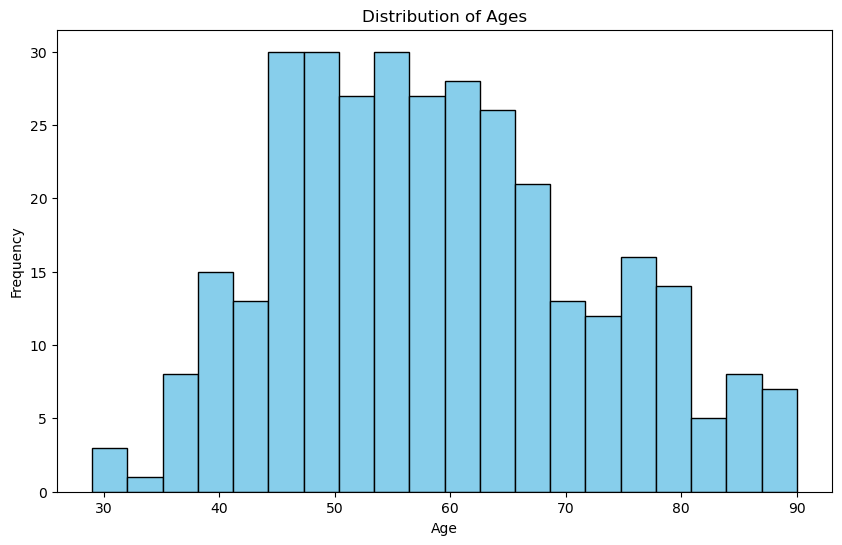

In [84]:
## 1st Plot
ages = np.array([float(row[1]) for row in data[1:] if row[1] != 'NA'])
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



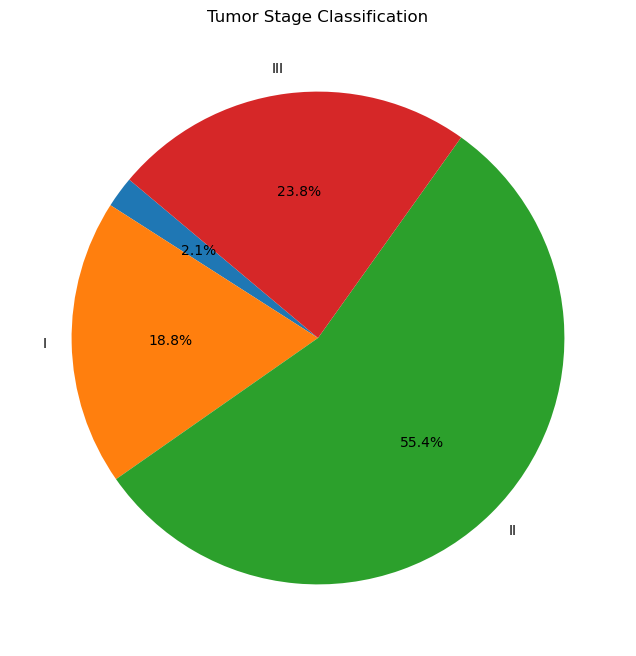

In [85]:
## 2nd Plot
tumor_stages = [row[7] for row in data[1:] if row[7] != 'NA']
stages, counts = np.unique(tumor_stages, return_counts=True)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=stages, autopct='%1.1f%%', startangle=140)
plt.title('Tumor Stage Classification')
plt.show()


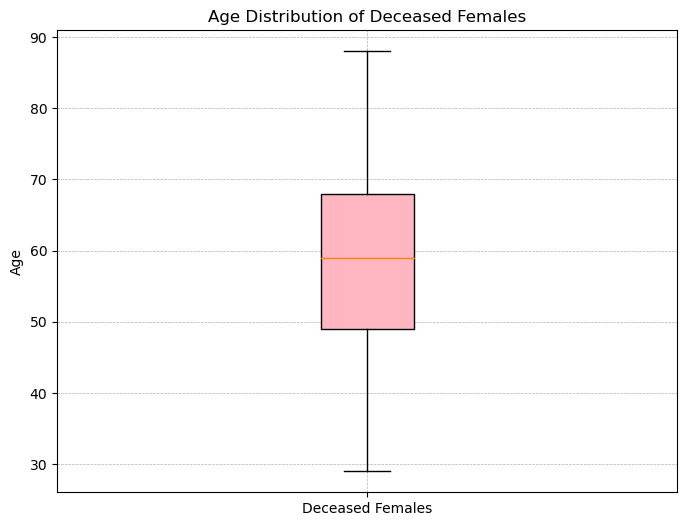

In [90]:
## 3rd Plot
deceased_female_ages = np.array([float(row[1]) for row in data[1:] if row[1] != 'NA' and row[2].lower() == 'female' and row[-1].lower() == 'dead'])
plt.figure(figsize=(8, 6))
plt.boxplot(deceased_female_ages, patch_artist=True, boxprops=dict(facecolor='lightpink'))
plt.title('Age Distribution of Deceased Females')
plt.ylabel('Age')
plt.xticks([1], ['Deceased Females'])  # Adjust the x-ticks to show meaningful labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

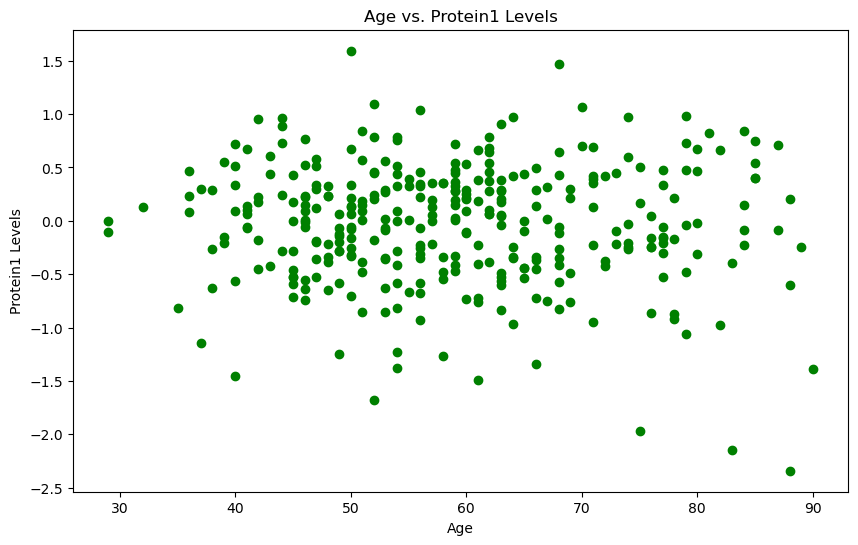

In [89]:
## 4th Plot
filtered_data = np.array([row for row in data[1:] if row[1] != 'NA' and row[2] != 'NA'])
ages_filtered = np.array(filtered_data[:, 1], dtype=float)
protein_levels_filtered = np.array(filtered_data[:, 3], dtype=float)
plt.figure(figsize=(10, 6))
plt.scatter(ages_filtered, protein_levels_filtered, color='green')
plt.title('Age vs. Protein1 Levels')
plt.xlabel('Age')
plt.ylabel('Protein1 Levels')
plt.show()